# Logistic Regression with stop words removed

I will use the paramters determined from my grid search and remove stop words to hopefully lower the variance

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [74]:
# from 03-notebook:  
#     Pipeline(memory=None,  
#          steps=[('cvec',  
#                  CountVectorizer(analyzer='word', binary=False,  
#                                  decode_error='strict',  
#                                  dtype=<class 'numpy.int64'>, encoding='utf-8',  
#                                  input='content', lowercase=True, max_df=0.9,  
#                                  max_features=5000, min_df=2,  
#                                  ngram_range=(1, 1), preprocessor=None,  
#                                  stop_words=None, strip_accents=None,  
#                                  token_pattern='(?u)\\b\\w\\w+\\b',  
#                                  tokenizer=None, vocabulary=None)),  
#                 ('lr',  
#                  LogisticRegression(C=1.0, class_weight=None, dual=False,  
#                                     fit_intercept=True, intercept_scaling=1,  
#                                     l1_ratio=None, max_iter=100,  
#                                     multi_class='auto', n_jobs=None,  
#                                     penalty='l2', random_state=None,  
#                                     solver='lbfgs', tol=0.0001, verbose=0,  
#                                     warm_start=False))],  

In [2]:
posts_df = pd.read_csv('./data/cleaned_reddit_posts.csv')
posts_df.drop(columns=('Unnamed: 0'), inplace=True)


In [3]:
weird_words = ['_unique_id', 'feed_id', 'https', 'கள', 'khabaruttarakhandki', 'onion' ]
stop = stopwords.words('english') + weird_words
cvec = CountVectorizer(stop_words=stop,
                      max_df=0.9,
                      min_df=2,
                      max_features = 5000)

In [4]:
X = posts_df['title']
X = cvec.fit_transform(X)

In [5]:
post_words = pd.DataFrame(X.toarray(), 
                       columns=cvec.get_feature_names())
post_words.head()

,000,0320,08,10,100,10th,11,12,12th,13,...,வந,வன,வமன,வர,வரத,வல,வழ,வழக,வழங,ஷன
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
posts_df_vec = pd.concat([posts_df.drop(columns=['title_length', 'title_word_count']), post_words], axis=1)
posts_df_vec.head()
posts_df_vec.to_csv('./data/posts_df_vec.csv')
posts_df_vec.head()

,author,subreddit,title,000,0320,08,10,100,10th,11,...,வந,வன,வமன,வர,வரத,வல,வழ,வழக,வழங,ஷன
0,ManofTheNightsWatch,0,Severely Injured Woman Heroically Fights Off P...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sanlear,0,Frat President Chews Out Brothers Infected Wit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aresef,0,Jim Harbaugh Annoyed He Only Got $5.89 For Sel...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,aresef,0,Congressional Republicans Grill Postmaster Gen...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aresef,0,Watchdog Groups Urge Bob Evans To Create Emerg...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Run Logisitc Regression with previously determined paramters

In [7]:
lr = LogisticRegression()
features = posts_df_vec.drop(columns=['author', 'subreddit', 'title'])
X = features
y = posts_df_vec['subreddit']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=17, stratify = y)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
lr.score(X_train, y_train)

0.9430056377730797

In [10]:
lr.score(X_test,y_test)

0.8480845442536328

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=17, stratify = y)

### Do a Gridsearch to test/ optimize some LogReg paramters

In [12]:
logreg = LogisticRegression()
lr_params = {
    'C':np.logspace(-1,5,10),
    'penalty': ['l1','l2','elasticnet'], #l1 is lasso, l2 is ridge
    'solver': ['lbfgs', 'liblinear']
}
gs = GridSearchCV(logreg,
               lr_params,
               cv=5)
#These parameters were suggested by Patrick to help lower my variance

In [13]:
#Fit the data, get the best score and estimator
gs.fit(X_train, y_train)

C:\Users\12155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\12155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\12155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
C:\Users\12155\anaconda3\lib\site-

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear']},
             pr

In [14]:
gs.best_score_

0.8435520070143177

In [15]:
gs.best_estimator_

LogisticRegression(C=0.46415888336127786, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(f'Train Best Score: {gs.score(X_train,y_train)}')
print(f'Test Best Score: {gs.score(X_test,y_test)}')

Train Best Score: 0.9277660324171952
Test Best Score: 0.8438573315719947


### Running a second, more optimized Logisitc Regression model

In [17]:
#Instantiate model, split to train and test, fit model
logreg_2 = LogisticRegression(C=0.46415888336127786,penalty='l2', random_state=17, solver='liblinear')
X_train, x_test, y_train, y_test = train_test_split(X,y,random_state=17, stratify=y)
logreg_2.fit(X_train, y_train)

LogisticRegression(C=0.46415888336127786, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Get accuracy scores
print(f'Train Score after optimizing parameters: {logreg_2.score(X_train,y_train)}')
print(f'Test Score after optimizing parameters: {logreg_2.score(X_test,y_test)}')

Train Score after optimizing parameters: 0.9278541226215645
Test Score after optimizing parameters: 0.8438573315719947


In [19]:
#Compare to my baseline
baseline = y.value_counts(normalize=True)
baseline

1    0.569532
0    0.430468
Name: subreddit, dtype: float64

In [20]:
#This has brought the train score closer to the test score, meaning the variance is lowered

### Confusion Matrix (5.04 and 4.05)

In [21]:
#get predictions
preds = logreg_2.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

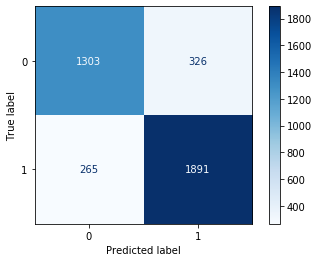

In [73]:
plot_confusion_matrix(logreg_2, X_test, y_test, cmap='Blues', values_format='d')
plt.savefig('./images/logreg_confusion.png');

In [23]:
#specificity
spec = tn/ (tn+fp)
spec

0.7998772252915899

In [24]:
#sensitivity
sens = tp/(tp+fn)
sens

0.87708719851577

In [25]:
#accuracy
acc = (tp+tn)/ (tp+tn+fp+fn)
acc

0.8438573315719947

In [26]:
#misclassification 
misclass = 1- acc
misclass

0.15614266842800528

In [27]:
#precision
prec = tp/(tp+fp)
prec

0.8529544429409112

### Create A DataFrame of X_test data to compare the predictions to the actual subreddit

In [28]:
indexes = X_test.index

In [29]:
#create a df from posts_df_vec where the index is the X_test index
test_data = posts_df_vec.loc[indexes][['subreddit', 'title']]

In [30]:
test_data.head()

,subreddit,title,title
3123,0,Benefits Of Open Office Not Extended To CEO,0
3798,0,Pros And Cons Of Salary Transparency,0
5250,0,Paramedics Didn’t Realize How Hard It Would Be...,0
5318,0,"The Week In Pictures – Week Of October 29, 2018",0
8234,1,Microsoft Plans Cloud Contract Push With Forei...,0


In [32]:
test_data['prediction'] = logreg_2.predict(X_test)

In [33]:
test_data.head()

,subreddit,title,title,prediction
3123,0,Benefits Of Open Office Not Extended To CEO,0,1
3798,0,Pros And Cons Of Salary Transparency,0,0
5250,0,Paramedics Didn’t Realize How Hard It Would Be...,0,0
5318,0,"The Week In Pictures – Week Of October 29, 2018",0,0
8234,1,Microsoft Plans Cloud Contract Push With Forei...,0,1


In [35]:
test_data.columns

Index(['subreddit', 'title', 'title', 'prediction'], dtype='object')

In [36]:
test_data = test_data['subreddit', 'title', 'delete', 'prediction']
test_data.head()

,subreddit,title,prediction
3123,0,Benefits Of Open Office Not Extended To CEO,1
3798,0,Pros And Cons Of Salary Transparency,0
5250,0,Paramedics Didn’t Realize How Hard It Would Be...,0
5318,0,"The Week In Pictures – Week Of October 29, 2018",0
8234,1,Microsoft Plans Cloud Contract Push With Forei...,1


In [60]:
mispredictions = test_data[(test_data['subreddit'] != test_data['prediction'])][['title']]

In [63]:
mispredictions.head(5)

,title
3123,Benefits Of Open Office Not Extended To CEO
3860,Congress Agrees To $1.3 Billion For Protective...
4176,Most Anticipated TV Shows Of 2019
11546,Falwell’s use of yacht comes under scrutiny
7997,"Officers in Lafayette, LA fatally shoot man wi..."


In [69]:
display.max_colwidth = -1 #https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
mis_indexes = mispredictions.index
test_data.loc[mis_indexes].head(20)

,subreddit,title,prediction
3123,0,Benefits Of Open Office Not Extended To CEO,1
3860,0,Congress Agrees To $1.3 Billion For Protective...,1
4176,0,Most Anticipated TV Shows Of 2019,1
11546,1,Falwell’s use of yacht comes under scrutiny,0
7997,1,"Officers in Lafayette, LA fatally shoot man wi...",0
2543,0,Cleveland Indians Game Delayed As Slider Goes ...,1
3031,0,Tips For Taking Care Of Houseplants,1
3438,0,Supper underrated onion series,1
440,0,Updated Patriot Act Finally Legalizes 80% Of C...,1
3038,0,Tracking Trump Administration Turnover,1
